In [37]:
import torch 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


['arr_0', 'arr_1', 'arr_2']
['images', 'labels', 'allow_pickle']
(5000, 28, 28)
<class 'torch.Tensor'>


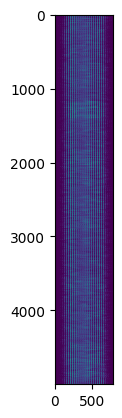

In [38]:
import numpy as np 
import torch 
import matplotlib.pyplot as plt
a0 = np.load('/home/pankhil/Desktop/dtu_mlops/data/corruptmnist/train_0.npz')
a1 = np.load('/home/pankhil/Desktop/dtu_mlops/data/corruptmnist/train_1.npz')
a2 = np.load('/home/pankhil/Desktop/dtu_mlops/data/corruptmnist/train_2.npz')
a3 = np.load('/home/pankhil/Desktop/dtu_mlops/data/corruptmnist/train_3.npz')
a4 =np.load('/home/pankhil/Desktop/dtu_mlops/data/corruptmnist/train_4.npz')

#check how many arrays these files have 
a = [a0,a1,a2,a3,a4]
#print(a0.files)
#print(a1.files)
#print(a2.files)
#print(a3.files)
#print(a4.files)
#merge each of arrays of these files 
arr_0 = np.array([a0['images'],a1['images'],a2['images'],a3['images'],a4['images']])
arr_1 = np.array([a0['labels'],a1['labels'],a2['labels'],a3['labels'],a4['labels']])
arr_2 = np.array([a0['allow_pickle'],a1['allow_pickle'],a2['allow_pickle'],a3['allow_pickle'],a4['allow_pickle']])


data  = np.load('/home/pankhil/Desktop/dtu_mlops/data/corruptmnist/data_new.npz')
print(data.files)
print(a0.files)
img = a0['images']
print(img.shape)
img1 = torch.from_numpy(img)
print(type(img1))

img2= img1.view(5000,784)

plt.imshow(img2)

In [39]:
images_list = []
labels_list = []
npz_files=['/home/pankhil/Desktop/dtu_mlops/data/corruptmnist/train_0.npz','/home/pankhil/Desktop/dtu_mlops/data/corruptmnist/train_1.npz','/home/pankhil/Desktop/dtu_mlops/data/corruptmnist/train_2.npz','/home/pankhil/Desktop/dtu_mlops/data/corruptmnist/train_3.npz','/home/pankhil/Desktop/dtu_mlops/data/corruptmnist/train_4.npz']

for npz_file in npz_files:
    data = np.load(npz_file)
    images = data['images']
    labels = data['labels']
    images_list.append(images)
    labels_list.append(labels)



combined_images = np.concatenate(images_list, axis=0)
combined_labels = np.concatenate(labels_list, axis=0)

combined_allow_pickle = data['allow_pickle']  # Use the value from any of the NPZ files

In [40]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])




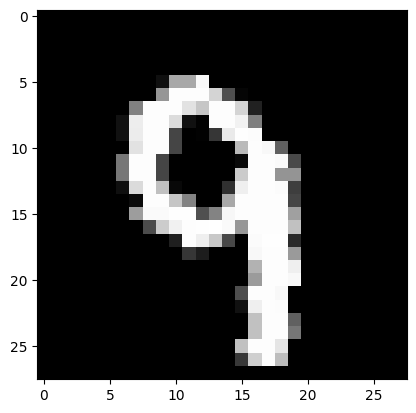

In [41]:
import numpy as np 

#images = torch.from_numpy(images)
plt.imshow(images[1].squeeze(), cmap='Greys_r');

In [42]:
print(labels.shape)

(5000,)


In [43]:
test = np.load('/home/pankhil/Desktop/dtu_mlops/data/corruptmnist/test.npz')
test_images = test['images']
test_labels = test['labels']


In [44]:
print(images.shape)

(5000, 28, 28)


In [45]:
X_train = images
y_train = labels
X_test = test_images
y_test  = test_labels

In [46]:
BATCH_SIZE=20

torch_X_train = torch.from_numpy(X_train).type(torch.LongTensor)
torch_X_train = torch_X_train.view(-1,1,28,28).float()
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

torch_X_test = torch.from_numpy(X_test).type(torch.LongTensor)
torch_X_test = torch_X_test.view(-1,1,28,28).float()
#torch_X_test = torch_X_test.view(-1, 784).float()
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long


train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)

test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)

from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])



train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)

test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)




In [47]:
print(torch_X_train.shape)

torch.Size([5000, 1, 28, 28])


In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm


class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)


In [51]:
model = CustomCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [54]:
num_epochs = 40

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for data, target in tqdm(train_loader):
        data,target = data.to(device),target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")


100%|██████████| 250/250 [00:01<00:00, 127.15it/s]


Epoch 1/40, Loss: 1.2648495631217958


100%|██████████| 250/250 [00:01<00:00, 142.98it/s]


Epoch 2/40, Loss: 1.2547298743724824


100%|██████████| 250/250 [00:01<00:00, 130.26it/s]


Epoch 3/40, Loss: 1.2468702094554902


100%|██████████| 250/250 [00:01<00:00, 134.25it/s]


Epoch 4/40, Loss: 1.2393148245811463


100%|██████████| 250/250 [00:01<00:00, 133.00it/s]


Epoch 5/40, Loss: 1.2351535460948944


100%|██████████| 250/250 [00:01<00:00, 131.85it/s]


Epoch 6/40, Loss: 1.2297866683006287


100%|██████████| 250/250 [00:01<00:00, 133.91it/s]


Epoch 7/40, Loss: 1.2256527769565582


100%|██████████| 250/250 [00:01<00:00, 131.45it/s]


Epoch 8/40, Loss: 1.223132461309433


100%|██████████| 250/250 [00:01<00:00, 133.83it/s]


Epoch 9/40, Loss: 1.2177698600292206


100%|██████████| 250/250 [00:01<00:00, 136.02it/s]


Epoch 10/40, Loss: 1.2135674979686737


100%|██████████| 250/250 [00:01<00:00, 139.98it/s]


Epoch 11/40, Loss: 1.2100701916217804


100%|██████████| 250/250 [00:01<00:00, 136.62it/s]


Epoch 12/40, Loss: 1.2030429773330689


100%|██████████| 250/250 [00:01<00:00, 128.95it/s]


Epoch 13/40, Loss: 1.1999022471904754


100%|██████████| 250/250 [00:02<00:00, 122.67it/s]


Epoch 14/40, Loss: 1.201897050857544


100%|██████████| 250/250 [00:01<00:00, 142.17it/s]


Epoch 15/40, Loss: 1.2043257248401642


100%|██████████| 250/250 [00:01<00:00, 138.15it/s]


Epoch 16/40, Loss: 1.1927559757232666


100%|██████████| 250/250 [00:01<00:00, 141.34it/s]


Epoch 17/40, Loss: 1.1912838661670684


100%|██████████| 250/250 [00:01<00:00, 141.09it/s]


Epoch 18/40, Loss: 1.1866307592391967


100%|██████████| 250/250 [00:01<00:00, 136.09it/s]


Epoch 19/40, Loss: 1.1837912170886993


100%|██████████| 250/250 [00:01<00:00, 139.21it/s]


Epoch 20/40, Loss: 1.1816739132404328


100%|██████████| 250/250 [00:01<00:00, 139.33it/s]


Epoch 21/40, Loss: 1.1785278232097627


100%|██████████| 250/250 [00:01<00:00, 139.26it/s]


Epoch 22/40, Loss: 1.1772976305484772


100%|██████████| 250/250 [00:01<00:00, 141.52it/s]


Epoch 23/40, Loss: 1.1788605711460114


100%|██████████| 250/250 [00:01<00:00, 137.95it/s]


Epoch 24/40, Loss: 1.1763435657024384


100%|██████████| 250/250 [00:01<00:00, 137.36it/s]


Epoch 25/40, Loss: 1.1731494243144989


100%|██████████| 250/250 [00:01<00:00, 142.18it/s]


Epoch 26/40, Loss: 1.1716108405590058


100%|██████████| 250/250 [00:01<00:00, 139.48it/s]


Epoch 27/40, Loss: 1.1674852092266084


100%|██████████| 250/250 [00:01<00:00, 136.19it/s]


Epoch 28/40, Loss: 1.164573455095291


100%|██████████| 250/250 [00:01<00:00, 141.35it/s]


Epoch 29/40, Loss: 1.1640490734577178


100%|██████████| 250/250 [00:01<00:00, 130.46it/s]


Epoch 30/40, Loss: 1.162244854927063


100%|██████████| 250/250 [00:01<00:00, 133.74it/s]


Epoch 31/40, Loss: 1.1603890907764436


100%|██████████| 250/250 [00:01<00:00, 139.88it/s]


Epoch 32/40, Loss: 1.1599358224868774


100%|██████████| 250/250 [00:01<00:00, 130.15it/s]


Epoch 33/40, Loss: 1.1755113670825958


100%|██████████| 250/250 [00:01<00:00, 133.70it/s]


Epoch 34/40, Loss: 1.1701839270591736


100%|██████████| 250/250 [00:01<00:00, 132.66it/s]


Epoch 35/40, Loss: 1.157595855474472


100%|██████████| 250/250 [00:01<00:00, 130.68it/s]


Epoch 36/40, Loss: 1.154855910539627


100%|██████████| 250/250 [00:01<00:00, 133.74it/s]


Epoch 37/40, Loss: 1.1531902532577514


100%|██████████| 250/250 [00:01<00:00, 136.38it/s]


Epoch 38/40, Loss: 1.1523218371868134


100%|██████████| 250/250 [00:01<00:00, 139.42it/s]


Epoch 39/40, Loss: 1.15051926612854


100%|██████████| 250/250 [00:01<00:00, 141.06it/s]


Epoch 40/40, Loss: 1.1493458540439605


In [55]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in tqdm(test_loader):
        data,target = data.to(device),target.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")



100%|██████████| 250/250 [00:00<00:00, 404.30it/s]

Test Accuracy: 29.92%


In [25]:
import torch.nn as nn 
import torch.nn.functional as F 
import torch.utils.data
from torch.autograd import Variable




class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(784,512)
        
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)
        
    def forward(self,X):
        X = X.view(-1, 784)  # Flatten the input
        X = F.relu(self.fc1(X))
        X = self.dropout(X)
        X = F.relu(self.fc2(X))
        X = self.dropout(X)
        X = F.relu(self.fc3(X))
        X = self.dropout(X)
        X = self.fc4(X)
        return F.log_softmax(X,dim=1)
    
    

In [26]:
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [27]:
def fit(model,train_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    error = nn.CrossEntropyLoss()
    epochs = 50
    model.train()
    for ep in range(epochs):
        correct=0
        for batch_idx, (X_batch,y_batch) in enumerate(train_loader):
            var_X_batch = Variable(X_batch).float()
            var_y_batch = Variable(y_batch)
            optimizer.zero_grad()
            output = model(var_X_batch)
            loss = error(output,var_y_batch)
            loss.backward()
            optimizer.step()
            
            predicted = torch.max(output.data,1)[1]
            correct+= (predicted == var_y_batch).sum()
            
            if  batch_idx %50==0:
                accuracy = float(correct.item() * 100) / float(BATCH_SIZE * (batch_idx + 1))
                print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    ep, batch_idx*len(X_batch), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.item(),accuracy))

In [28]:
fit(model,train_loader)

Epoch : 0 [0/5000 (0%)]	Loss: 2.309173	 Accuracy:10.000%
Epoch : 0 [1000/5000 (20%)]	Loss: 2.304722	 Accuracy:10.882%
Epoch : 0 [2000/5000 (40%)]	Loss: 2.305069	 Accuracy:11.089%
Epoch : 0 [3000/5000 (60%)]	Loss: 2.301751	 Accuracy:11.623%
Epoch : 0 [4000/5000 (80%)]	Loss: 2.183658	 Accuracy:13.060%
Epoch : 1 [0/5000 (0%)]	Loss: 2.242815	 Accuracy:10.000%
Epoch : 1 [1000/5000 (20%)]	Loss: 1.926332	 Accuracy:25.098%
Epoch : 1 [2000/5000 (40%)]	Loss: 1.900012	 Accuracy:26.584%
Epoch : 1 [3000/5000 (60%)]	Loss: 2.156223	 Accuracy:26.921%
Epoch : 1 [4000/5000 (80%)]	Loss: 1.739037	 Accuracy:27.736%
Epoch : 2 [0/5000 (0%)]	Loss: 1.968043	 Accuracy:30.000%
Epoch : 2 [1000/5000 (20%)]	Loss: 1.657807	 Accuracy:32.059%
Epoch : 2 [2000/5000 (40%)]	Loss: 1.777502	 Accuracy:33.515%
Epoch : 2 [3000/5000 (60%)]	Loss: 1.924345	 Accuracy:33.775%
Epoch : 2 [4000/5000 (80%)]	Loss: 1.940284	 Accuracy:34.204%
Epoch : 3 [0/5000 (0%)]	Loss: 1.873932	 Accuracy:40.000%
Epoch : 3 [1000/5000 (20%)]	Loss: 1.9714

In [30]:
def evaluate(model):
#model = Net
    correct = 0 
    for test_imgs, test_labels in test_loader:
        #print(test_imgs.shape)
        test_imgs = Variable(test_imgs).float()
        output = model(test_imgs)
        predicted = torch.max(output,1)[1]
        correct += (predicted == test_labels).sum()
    print("Test accuracy:{:.3f}% ".format( float(correct) / (len(test_loader)*BATCH_SIZE)))
evaluate(model)

Test accuracy:0.267% 


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms

# Define a function to load and preprocess your data
def load_data():
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
    
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)
    
    return train_loader, test_loader

# Define an improved model with more capacity and dropout
class ImprovedNet(nn.Module):
    def __init__(self):
        super(ImprovedNet, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

# Train the improved model
def train(model, train_loader, num_epochs=10, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = Variable(data), Variable(target)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            if batch_idx % 100 == 0:
                print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}")

# Test the model
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = Variable(data), Variable(target)
            output = model(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    
    print(f"Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")

if __name__ == '__main__':
    train_loader, test_loader = load_data()
    model = ImprovedNet()
    train(model, train_loader, num_epochs=10, learning_rate=0.001)
    test(model, test_loader)

ImprovedCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=6272, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)


In [20]:
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0 
    for i, data in enumerate(train_loader,0):
        inputs,labels = data
        
        inputs = inputs.view(-1, 1, 28, 28)
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"[{epoch + 1}, {i + 1}] Loss: {running_loss / 100:.3f}")
            running_loss = 0.0

RuntimeError: shape '[-1, 6272]' is invalid for input of size 23040